## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.169893 -0.935308 -0.921594 -1.749936 -1.491667 -1.490183
1  1.124975 -0.855361 -0.587051  0.042786 -1.154345 -0.448008
2 -1.795706 -0.775997 -0.592265 -0.594573  0.115904 -1.599194
3  0.727968  1.414571  1.644504  1.466054 -0.888361  1.915399
4  0.262628  1.175334  0.295204 -0.177876  0.882529  0.801655


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0195538	total: 57.4ms	remaining: 57.3s
1:	learn: 1.0091434	total: 58.2ms	remaining: 29s
2:	learn: 0.9979745	total: 58.7ms	remaining: 19.5s
3:	learn: 0.9877703	total: 59.3ms	remaining: 14.8s
4:	learn: 0.9776536	total: 59.8ms	remaining: 11.9s
5:	learn: 0.9686648	total: 60.4ms	remaining: 10s
6:	learn: 0.9577232	total: 60.9ms	remaining: 8.64s
7:	learn: 0.9469414	total: 61.5ms	remaining: 7.62s
8:	learn: 0.9380741	total: 61.9ms	remaining: 6.82s
9:	learn: 0.9287436	total: 62.4ms	remaining: 6.18s
10:	learn: 0.9202102	total: 62.8ms	remaining: 5.65s
11:	learn: 0.9105334	total: 63.3ms	remaining: 5.21s
12:	learn: 0.9006912	total: 63.8ms	remaining: 4.84s
13:	learn: 0.8922028	total: 64.2ms	remaining: 4.52s
14:	learn: 0.8857545	total: 64.6ms	remaining: 4.24s
15:	learn: 0.8777385	total: 65.1ms	remaining: 4s
16:	learn: 0.8687900	total: 65.6ms	remaining: 3.79s
17:	learn: 0.8611070	total: 66ms	remaining: 3.6s
18:	learn: 0.8539676	total: 66.4ms	remaining: 3.43s
19

76:	learn: 0.5012390	total: 93.9ms	remaining: 1.13s
77:	learn: 0.4972325	total: 94.5ms	remaining: 1.12s
78:	learn: 0.4930832	total: 95ms	remaining: 1.11s
79:	learn: 0.4887771	total: 95.6ms	remaining: 1.1s
80:	learn: 0.4849010	total: 96.1ms	remaining: 1.09s
81:	learn: 0.4812938	total: 96.9ms	remaining: 1.08s
82:	learn: 0.4771254	total: 97.7ms	remaining: 1.08s
83:	learn: 0.4730074	total: 98.1ms	remaining: 1.07s
84:	learn: 0.4694762	total: 98.5ms	remaining: 1.06s
85:	learn: 0.4653925	total: 99.1ms	remaining: 1.05s
86:	learn: 0.4614384	total: 99.5ms	remaining: 1.04s
87:	learn: 0.4577342	total: 99.9ms	remaining: 1.03s
88:	learn: 0.4536986	total: 101ms	remaining: 1.03s
89:	learn: 0.4498805	total: 102ms	remaining: 1.03s
90:	learn: 0.4467886	total: 103ms	remaining: 1.02s
91:	learn: 0.4428845	total: 103ms	remaining: 1.02s
92:	learn: 0.4395172	total: 104ms	remaining: 1.01s
93:	learn: 0.4358171	total: 104ms	remaining: 1s
94:	learn: 0.4328775	total: 105ms	remaining: 996ms
95:	learn: 0.4297663	tota

261:	learn: 0.1308775	total: 187ms	remaining: 527ms
262:	learn: 0.1300965	total: 188ms	remaining: 526ms
263:	learn: 0.1290138	total: 188ms	remaining: 525ms
264:	learn: 0.1281405	total: 189ms	remaining: 523ms
265:	learn: 0.1271272	total: 189ms	remaining: 522ms
266:	learn: 0.1262060	total: 189ms	remaining: 520ms
267:	learn: 0.1252317	total: 190ms	remaining: 519ms
268:	learn: 0.1245865	total: 190ms	remaining: 517ms
269:	learn: 0.1235257	total: 191ms	remaining: 516ms
270:	learn: 0.1228066	total: 191ms	remaining: 514ms
271:	learn: 0.1219861	total: 192ms	remaining: 513ms
272:	learn: 0.1210524	total: 192ms	remaining: 512ms
273:	learn: 0.1203139	total: 193ms	remaining: 511ms
274:	learn: 0.1194274	total: 193ms	remaining: 509ms
275:	learn: 0.1186607	total: 194ms	remaining: 508ms
276:	learn: 0.1178207	total: 194ms	remaining: 506ms
277:	learn: 0.1169471	total: 194ms	remaining: 505ms
278:	learn: 0.1161141	total: 195ms	remaining: 504ms
279:	learn: 0.1153376	total: 196ms	remaining: 503ms
280:	learn: 

440:	learn: 0.0403713	total: 279ms	remaining: 353ms
441:	learn: 0.0401093	total: 279ms	remaining: 352ms
442:	learn: 0.0398408	total: 280ms	remaining: 352ms
443:	learn: 0.0395790	total: 280ms	remaining: 351ms
444:	learn: 0.0393452	total: 281ms	remaining: 350ms
445:	learn: 0.0390984	total: 281ms	remaining: 349ms
446:	learn: 0.0388080	total: 282ms	remaining: 348ms
447:	learn: 0.0385900	total: 282ms	remaining: 347ms
448:	learn: 0.0383168	total: 283ms	remaining: 347ms
449:	learn: 0.0380979	total: 283ms	remaining: 346ms
450:	learn: 0.0378840	total: 283ms	remaining: 345ms
451:	learn: 0.0376719	total: 284ms	remaining: 344ms
452:	learn: 0.0374665	total: 284ms	remaining: 343ms
453:	learn: 0.0372709	total: 285ms	remaining: 342ms
454:	learn: 0.0370540	total: 285ms	remaining: 341ms
455:	learn: 0.0368334	total: 285ms	remaining: 340ms
456:	learn: 0.0366448	total: 286ms	remaining: 340ms
457:	learn: 0.0364162	total: 286ms	remaining: 339ms
458:	learn: 0.0362335	total: 287ms	remaining: 338ms
459:	learn: 

626:	learn: 0.0177889	total: 371ms	remaining: 221ms
627:	learn: 0.0177657	total: 372ms	remaining: 220ms
628:	learn: 0.0177029	total: 372ms	remaining: 220ms
629:	learn: 0.0176386	total: 373ms	remaining: 219ms
630:	learn: 0.0175608	total: 373ms	remaining: 218ms
631:	learn: 0.0175049	total: 374ms	remaining: 218ms
632:	learn: 0.0174585	total: 374ms	remaining: 217ms
633:	learn: 0.0173961	total: 375ms	remaining: 216ms
634:	learn: 0.0173739	total: 375ms	remaining: 216ms
635:	learn: 0.0172594	total: 376ms	remaining: 215ms
636:	learn: 0.0171920	total: 376ms	remaining: 215ms
637:	learn: 0.0170824	total: 377ms	remaining: 214ms
638:	learn: 0.0170201	total: 377ms	remaining: 213ms
639:	learn: 0.0169459	total: 378ms	remaining: 213ms
640:	learn: 0.0168361	total: 379ms	remaining: 212ms
641:	learn: 0.0167586	total: 379ms	remaining: 211ms
642:	learn: 0.0166604	total: 380ms	remaining: 211ms
643:	learn: 0.0165578	total: 380ms	remaining: 210ms
644:	learn: 0.0164996	total: 381ms	remaining: 210ms
645:	learn: 

799:	learn: 0.0089424	total: 463ms	remaining: 116ms
800:	learn: 0.0088861	total: 464ms	remaining: 115ms
801:	learn: 0.0088308	total: 465ms	remaining: 115ms
802:	learn: 0.0087898	total: 466ms	remaining: 114ms
803:	learn: 0.0087476	total: 466ms	remaining: 114ms
804:	learn: 0.0087074	total: 467ms	remaining: 113ms
805:	learn: 0.0086687	total: 467ms	remaining: 112ms
806:	learn: 0.0086308	total: 468ms	remaining: 112ms
807:	learn: 0.0085916	total: 468ms	remaining: 111ms
808:	learn: 0.0085543	total: 469ms	remaining: 111ms
809:	learn: 0.0085448	total: 469ms	remaining: 110ms
810:	learn: 0.0085066	total: 470ms	remaining: 109ms
811:	learn: 0.0084699	total: 470ms	remaining: 109ms
812:	learn: 0.0084605	total: 470ms	remaining: 108ms
813:	learn: 0.0084233	total: 471ms	remaining: 108ms
814:	learn: 0.0084013	total: 471ms	remaining: 107ms
815:	learn: 0.0083652	total: 472ms	remaining: 106ms
816:	learn: 0.0083436	total: 472ms	remaining: 106ms
817:	learn: 0.0083224	total: 473ms	remaining: 105ms
818:	learn: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

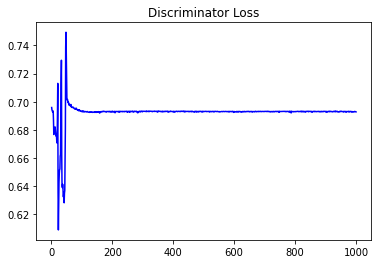

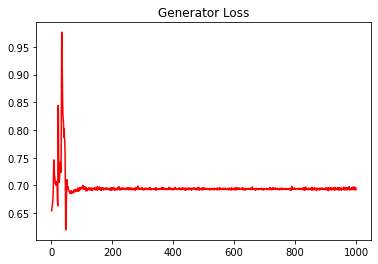

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.07888741661463441


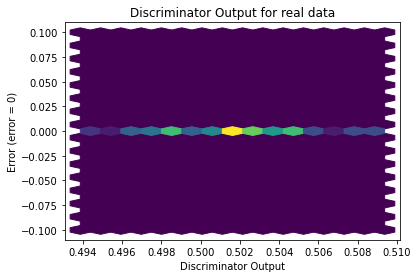

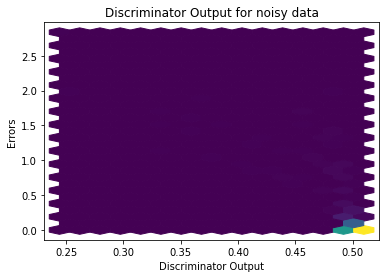

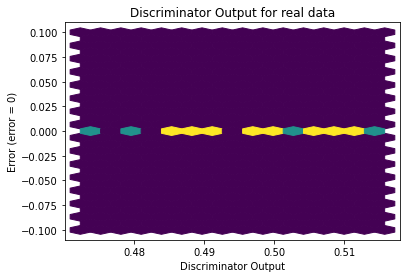

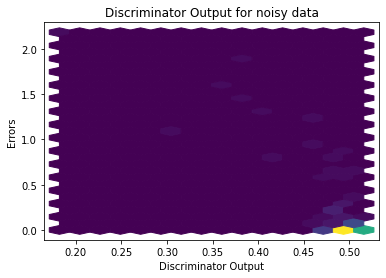

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


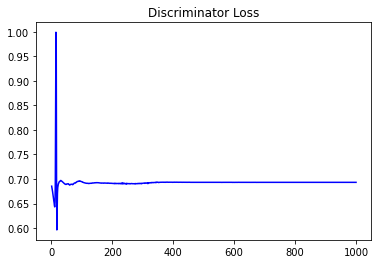

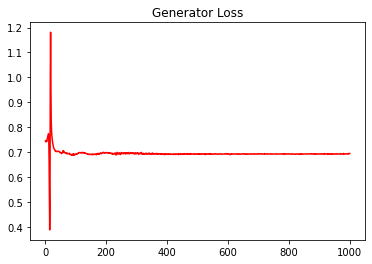

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.10700873182436173


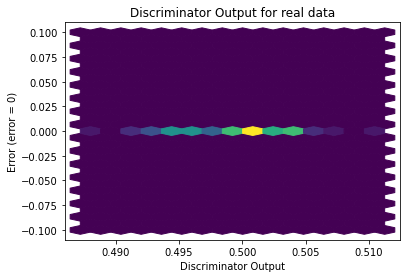

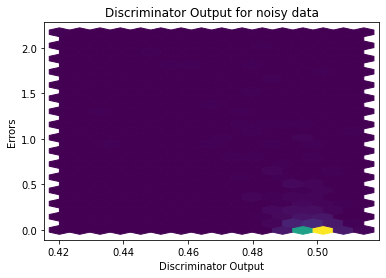

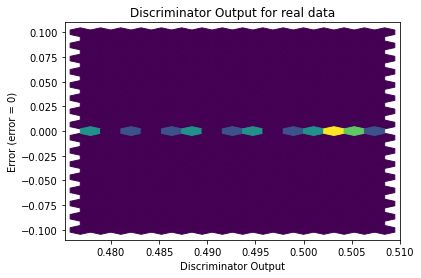

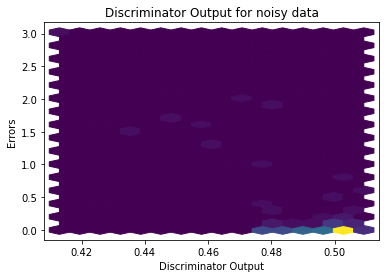

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0721]], requires_grad=True)
